In [57]:
#importing important libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')

In [58]:
#loading dataset
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [59]:
df.drop(columns=['Lattitude','Longtitude','Propertycount','Date'], axis=1, inplace=True)

In [60]:
df.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan


In [61]:
random_indices = np.random.choice(range(1, 13001), size=7000, replace=False)
df = df.loc[random_indices]
df.reset_index(drop=True, inplace=True)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        7000 non-null   object 
 1   Address       7000 non-null   object 
 2   Rooms         7000 non-null   int64  
 3   Type          7000 non-null   object 
 4   Price         7000 non-null   float64
 5   Method        7000 non-null   object 
 6   SellerG       7000 non-null   object 
 7   Distance      7000 non-null   float64
 8   Postcode      7000 non-null   float64
 9   Bedroom2      7000 non-null   float64
 10  Bathroom      7000 non-null   float64
 11  Car           6977 non-null   float64
 12  Landsize      7000 non-null   float64
 13  BuildingArea  3643 non-null   float64
 14  YearBuilt     4213 non-null   float64
 15  CouncilArea   6580 non-null   object 
 16  Regionname    7000 non-null   object 
dtypes: float64(9), int64(1), object(7)
memory usage: 929.8+ KB


In [63]:
df.shape

(7000, 17)

In [64]:
df.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car               23
Landsize           0
BuildingArea    3357
YearBuilt       2787
CouncilArea      420
Regionname         0
dtype: int64

### **Data Cleaning**

In [65]:
## Unique value counts of categorical variables

cat_columns = df.columns[df.dtypes == 'object']
for col in cat_columns:
    print(f"{col}: {df[col].nunique()}")

Suburb: 292
Address: 6943
Type: 3
Method: 5
SellerG: 215
CouncilArea: 32
Regionname: 8


In [66]:
df['Address'].value_counts()

Address
53 William St        3
2 Bruce St           3
18 Pullar St         2
50 Bedford St        2
19 Gordon Gr         2
                    ..
9/11 Smith St        1
7/696 Waverley Rd    1
2 Campbell St        1
1/5 Glover St        1
22/49 Walsh St       1
Name: count, Length: 6943, dtype: int64

In [67]:
# prompt: from address details, I want only last word like St, Rd, Ct

df['Address_Type'] = df['Address'].apply(lambda x: x.split(' ')[-1] if isinstance(x, str) else None)


In [68]:
df['Address_Type'].unique()

array(['St', 'La', 'Gr', 'Rd', 'Ct', 'Pde', 'Av', 'Strand', 'Cr', 'Pl',
       'Dr', 'Cl', 'Sq', 'Bvd', 'Mews', 'Cct', 'Wy', 'Avenue', 'Tce',
       'Boulevard', 'Grove', 'Crescent', 'Parade', 'Grn', 'Esplanade',
       'Righi', 'S', 'Hwy', 'Terrace', 'N', 'Cir', 'Dell', 'E', 'Fairway',
       'Ridge', 'Crofts', 'Grand', 'Qy', 'Gra', 'Loop', 'Glade',
       'Crossway', 'East', 'Eyrie', 'Athol', 'Ave', 'Victoria', 'W',
       'Woodland'], dtype=object)

**We reduced the long address into short one on the basis of common road type.**



In [69]:
#drop address and add address_type to the df

df = df.drop(['Address'], axis=1)
df.head(3)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Address_Type
0,Fitzroy,2,u,715000.0,S,Nelson,1.6,3065.0,2.0,1.0,1.0,0.0,74.0,1900.0,Yarra,Northern Metropolitan,St
1,South Yarra,1,u,370000.0,SP,Marshall,3.3,3141.0,1.0,1.0,1.0,0.0,NaN,NaN,Stonnington,Southern Metropolitan,La
2,Ascot Vale,2,u,540000.0,S,Jellis,5.9,3032.0,2.0,2.0,1.0,0.0,NaN,NaN,Moonee Valley,Western Metropolitan,St


### **Handling Missing Values**

In [70]:
df['Car'].value_counts()

Car
1.0     2865
2.0     2850
0.0      546
3.0      387
4.0      265
5.0       27
6.0       24
7.0        7
8.0        4
10.0       1
9.0        1
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

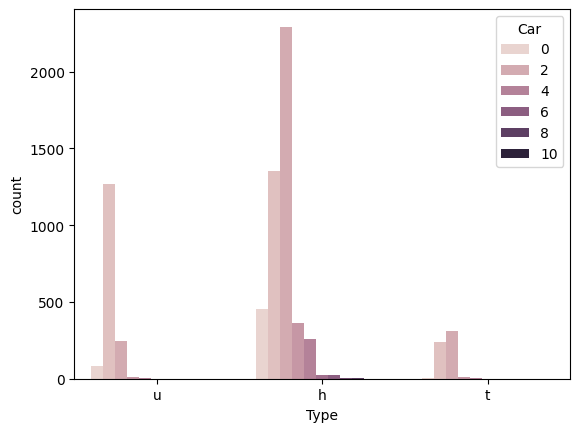

In [71]:
# Distribution of number of cars on the bais of type

sns.countplot(x='Type', hue='Car', data=df)

**We replace missing value of car on the basis of house Type**


*   2 if h
*   1 if u
* 2 if t



In [72]:
df['Car'] = df['Car'].fillna(df.groupby('Type')['Car'].transform(lambda x: x.mode()[0]))

In [73]:
df.isnull().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea    3357
YearBuilt       2787
CouncilArea      420
Regionname         0
Address_Type       0
dtype: int64

<Axes: xlabel='Rooms', ylabel='BuildingArea'>

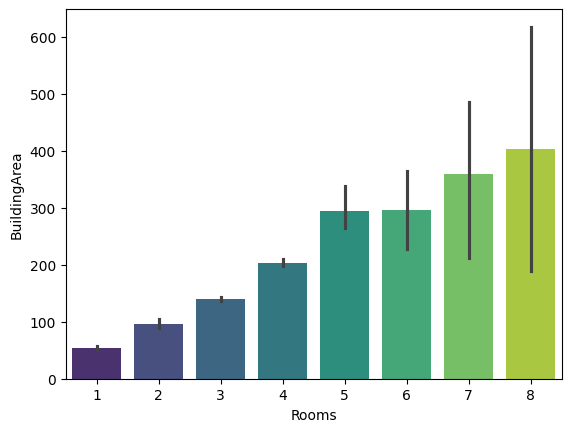

In [74]:
# relationship of rooms with building size

sns.barplot(x='Rooms', y='BuildingArea', data=df, palette='viridis')

In [75]:
df.groupby('Rooms')['BuildingArea'].mean()

Rooms
1     53.665222
2     96.014422
3    140.606453
4    204.002966
5    293.925690
6    296.666667
7    359.885000
8    404.000000
Name: BuildingArea, dtype: float64

In [76]:
df['Rooms'].value_counts()

Rooms
3    2997
2    1946
4    1365
1     347
5     307
6      28
8       5
7       5
Name: count, dtype: int64

In [77]:
df['BuildingArea'] = df.groupby('Rooms')['BuildingArea'].transform(lambda x: x.fillna(x.mean()))

In [78]:
df.head(2)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Address_Type
0,Fitzroy,2,u,715000.0,S,Nelson,1.6,3065.0,2.0,1.0,1.0,0.0,74.000000,1900.0,Yarra,Northern Metropolitan,St
1,South Yarra,1,u,370000.0,SP,Marshall,3.3,3141.0,1.0,1.0,1.0,0.0,53.665222,NaN,Stonnington,Southern Metropolitan,La


In [79]:
# yearbuilt based on type

df.groupby('Type')['YearBuilt'].apply(lambda x: x.mode()[0])

Type
h    1960.0
t    2000.0
u    1970.0
Name: YearBuilt, dtype: float64

In [80]:
# impute missing value of yearbuilt on the basis of feature type mode

df['YearBuilt'] = df.groupby('Type')['YearBuilt'].transform(lambda x: x.fillna(x.mode()[0]))

In [81]:
df.isnull().sum()

Suburb            0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Distance          0
Postcode          0
Bedroom2          0
Bathroom          0
Car               0
Landsize          0
BuildingArea      0
YearBuilt         0
CouncilArea     420
Regionname        0
Address_Type      0
dtype: int64

In [82]:
df['CouncilArea'].value_counts()

CouncilArea
Moreland             647
Boroondara           632
Moonee Valley        508
Glen Eira            487
Darebin              480
Stonnington          389
Maribyrnong          361
Yarra                341
Banyule              337
Port Phillip         329
Bayside              279
Melbourne            261
Brimbank             244
Hobsons Bay          232
Monash               181
Manningham           166
Whitehorse           159
Kingston             113
Hume                  86
Whittlesea            76
Wyndham               48
Maroondah             43
Melton                33
Knox                  32
Frankston             31
Greater Dandenong     24
Casey                 21
Nillumbik             20
Yarra Ranges          11
Macedon Ranges         5
Cardinia               3
Unavailable            1
Name: count, dtype: int64

In [83]:
# get CouncilArea one largest value based on Regionname for each unique Regionname

df['CouncilArea'] = df.groupby('Regionname')['CouncilArea'].transform(lambda x: x.fillna(x.value_counts().index[0]))

<Axes: >

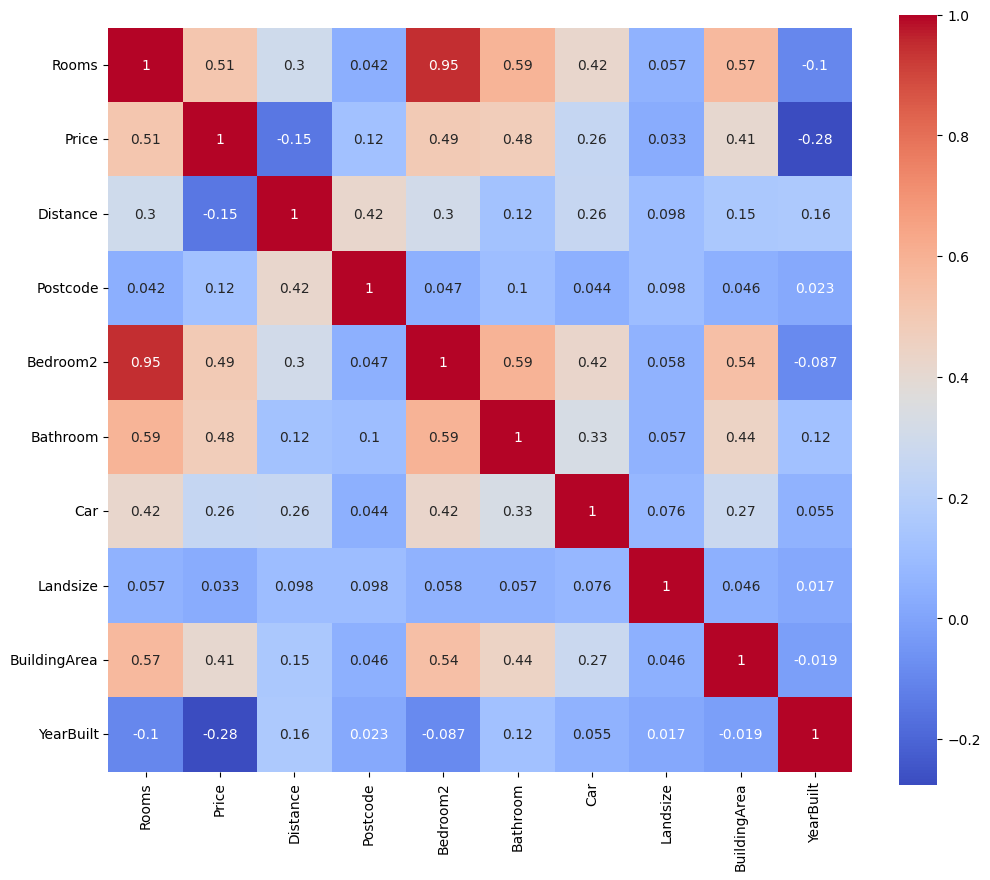

In [84]:
# Correlation of numerical columns and plotting them in matrix form

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, square=True, cmap='coolwarm')

In [85]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import joblib
from sklearn.compose import ColumnTransformer

In [86]:
df.head(2)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Address_Type
0,Fitzroy,2,u,715000.0,S,Nelson,1.6,3065.0,2.0,1.0,1.0,0.0,74.000000,1900.0,Yarra,Northern Metropolitan,St
1,South Yarra,1,u,370000.0,SP,Marshall,3.3,3141.0,1.0,1.0,1.0,0.0,53.665222,1970.0,Stonnington,Southern Metropolitan,La


### **Model Training Phase**

In [87]:
df.isnull().sum()

Suburb          0
Rooms           0
Type            0
Price           0
Method          0
SellerG         0
Distance        0
Postcode        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Regionname      0
Address_Type    0
dtype: int64

In [88]:
df['BuildingArea'].fillna(df['BuildingArea'].mean(), inplace=True)

In [89]:
# Seperate dependent and independent variables

X = df.drop(columns=['Price'])
y = df['Price']

In [90]:
X.isnull().sum()

Suburb          0
Rooms           0
Type            0
Method          0
SellerG         0
Distance        0
Postcode        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Regionname      0
Address_Type    0
dtype: int64

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt'],
      dtype='object')

In [93]:
from sklearn.pipeline import Pipeline
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [94]:
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [95]:
# import Random Forest Regressor, Adaboost regressor, gradient boosting regressor, Xgboost regressor

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [96]:
#import cross validation

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [97]:
# Custom transformer for frequency encoding
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.freq_encoding = {}

    def fit(self, X, y=None):
        for column in X.columns:
            self.freq_encoding[column] = X[column].value_counts().to_dict()
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        for column in X.columns:
            X_transformed[column] = X[column].map(self.freq_encoding[column]).fillna(0)
        return X_transformed

# Custom transformer for target-guided mean encoding
class TargetMeanEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, smoothing=12):
        self.smoothing = smoothing
        self.target_means = {}
        self.global_mean = None

    def fit(self, X, y):
        self.global_mean = y.mean()
        for column in X.columns:
            category_means = y.groupby(X[column]).mean()
            category_counts = X[column].value_counts()
            smoothed_means = (category_counts * category_means + self.smoothing * self.global_mean) / (category_counts + self.smoothing)
            self.target_means[column] = smoothed_means
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for column in X.columns:
            X_transformed[column] = X[column].map(self.target_means[column]).fillna(self.global_mean)
        return X_transformed


In [98]:
frequency_encoding_features = ['Type', 'Method', 'CouncilArea', 'Regionname']
mean_target_encoding_features = ['Suburb', 'SellerG', 'Address_Type']
standard_scaling_features = numerical_columns

In [99]:
# Define transformers
frequency_transformer = FrequencyEncoder()
target_mean_transformer = TargetMeanEncoder(smoothing=12)
scaler_transformer = StandardScaler()

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('freq', frequency_transformer, frequency_encoding_features),
        ('scaler', scaler_transformer, standard_scaling_features),
        ('targetmean', target_mean_transformer, mean_target_encoding_features)
    ])


In [100]:
models = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42)
}

cv_result = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Evaluate using cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    cv_score_mean = np.mean(cv_scores)
    cv_result[model_name] = cv_score_mean

    print(f"CV Score for {model_name}: {cv_score_mean}")
    print("")



Training RandomForestRegressor...
CV Score for RandomForestRegressor: 0.7757844657879129

Training AdaBoostRegressor...
CV Score for AdaBoostRegressor: 0.3827743348035787

Training GradientBoostingRegressor...
CV Score for GradientBoostingRegressor: 0.779387566519788

Training XGBRegressor...
CV Score for XGBRegressor: 0.7905503108508138



In [101]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

In [102]:
# Define hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'regressor__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'regressor__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

In [103]:
from sklearn.model_selection import RandomizedSearchCV


In [104]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=20, cv=3, scoring='r2', n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('freq',
                                                                               FrequencyEncoder(),
                                                                               ['Type',
                                                                                'Method',
                                                                                'CouncilArea',
                                                                                'Regionname']),
                                                                              ('scaler',
                                                                               StandardScaler(),
                                                                               Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt'],
      dtype='object')),
                                                                              ('targetmean',
                                                                               TargetMeanEncoder...
                                                           random_state=42, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'regressor__colsample_bytree': [0.6,
                                                                        0.7,
                                                                        0.8,
                                                                        0.9,
                                                                        1.0],
                                        'regressor__learning_rate': [0.01, 0.05,
                                                                     0.1, 0.15,
                                                                     0.2],
                                        'regressor__max_depth': [3, 4, 5, 6, 7,
                                                                 8, 9, 10],
                                        'regressor__n_estimators': [100, 200,
                                                                    300, 400,
                                                                    500, 600,
                                                                    700],
                                        'regressor__subsample': [0.6, 0.7, 0.8,
                                                                 0.9, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

In [105]:
# Print best parameters and score
print("Best parameters found\n", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best parameters found
 {'regressor__subsample': 0.7, 'regressor__n_estimators': 500, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.05, 'regressor__colsample_bytree': 0.8}
Best cross-validation score:  0.8083181329274115


In [106]:
# Evaluate on the test set
test_score = random_search.score(X_test, y_test)
print("Test score: ", test_score)

Test score:  0.822628156243853


In [107]:
# Export the model
joblib.dump(random_search.best_estimator_, 'best_xgb_model.joblib')
print("Model saved as 'best_xgb_model.joblib'")

Model saved as 'best_xgb_model.joblib'


In [108]:
# Exporting the cleaned dataframe
joblib.dump(X,'Cleaned_df.pkl')
print("Model saved as 'Cleaned_df.pkl")

Model saved as 'Cleaned_df.pkl


In [109]:
X.head(2)

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Address_Type
0,Fitzroy,2,u,S,Nelson,1.6,3065.0,2.0,1.0,1.0,0.0,74.000000,1900.0,Yarra,Northern Metropolitan,St
1,South Yarra,1,u,SP,Marshall,3.3,3141.0,1.0,1.0,1.0,0.0,53.665222,1970.0,Stonnington,Southern Metropolitan,La


In [110]:
X.columns

Index(['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Regionname', 'Address_Type'],
      dtype='object')

In [111]:
import streamlit as st
import pickle

In [112]:
# Write the Streamlit app to a file
app_code = '''

import pandas as pd
import joblib
import streamlit as st
from PIL import Image
from Custom_class.custom_transformers import FrequencyEncoder, TargetMeanEncoder

# Load cleaned dataframe
X = joblib.load('Cleaned_df.pkl')

unique_suburbs = ['Choose an option'] + list(X['Suburb'].unique())
unique_types = ['Choose an option'] + list(X['Type'].unique())
unique_methods = ['Choose an option'] + list(X['Method'].unique())
unique_seller_g = ['Choose an option'] + list(X['SellerG'].unique())
unique_council_area = ['Choose an option'] + list(X['CouncilArea'].unique())
unique_regionname = ['Choose an option'] + list(X['Regionname'].unique())
unique_address_type = ['Choose an option'] + list(X['Address_Type'].unique())

# Collect user input
def user_input_features():
    col1, col2 = st.columns(2)

    with col1:
        suburb = st.selectbox("Suburb", unique_suburbs, index=0, key="suburb")
        rooms = st.number_input("Rooms", value=0, key="rooms")
        property_type = st.selectbox("House Type", unique_types, index=0, key="type")
        method = st.selectbox("Method", unique_methods, index=0, key="method")
        seller_g = st.selectbox("Broker", unique_seller_g, index=0, key="seller_g")
        distance = st.number_input("Distance", value=0.0, key="distance")
        postcode = st.number_input("Postcode", value=0, key="postcode")
        bedroom2 = st.number_input("Bedroom", value=0, key="bedroom2")
        

    with col2:
        car = st.number_input("Car Spot", value=0, key="car")
        land_size = st.number_input("Landsize", value=0.0, key="land_size")
        building_area = st.number_input("Building Area", value=0.0, key="building_area")
        year_built = st.number_input("Year Built", value=0, key="year_built")
        council_area = st.selectbox("Council Area", unique_council_area, index=0, key="council_area")
        regionname = st.selectbox("Region Name", unique_regionname, index=0, key="regionname")
        address_type = st.selectbox("Address Type", unique_address_type, index=0, key="address_type")
        bathroom = st.number_input("Bathroom", value=0, key="bathroom")

    # Return user inputs as a DataFrame
    data = {
        'Suburb': [suburb],
        'Rooms': [rooms],
        'Type': [property_type],
        'Method': [method],
        'SellerG': [seller_g],
        'Distance': [distance],
        'Postcode': [postcode],
        'Bedroom2': [bedroom2],
        'Bathroom': [bathroom],
        'Car': [car],
        'Landsize': [land_size],
        'BuildingArea': [building_area],
        'YearBuilt': [year_built],
        'CouncilArea': [council_area],
        'Regionname': [regionname],
        'Address_Type': [address_type]
    }
    return pd.DataFrame(data)

# Streamlit app title
st.markdown('<h1 style="font-family:Georgia, serif; font-size:48px; color:#333;">Melbourne House Price Prediction</h1>', unsafe_allow_html=True)
st.subheader("Welcome! Here you can predict the price of a house based on its features.")

# Custom CSS for styling
st.markdown(
    """
    <style>
    body {
        font-family: 'Arial', sans-serif;
        background-color: #f4f4f9;
        color: #333;
    }
    .stApp {
        background-color: #f4f4f9;
    }
    .prediction-box {
        background-color: #2b9f9f;
        color: white;
        padding: 20px;
        border-radius: 10px;
        text-align: center;
        font-size: 24px;
        margin-top: 20px;
    }
    .st-bx label {
        font-weight: bold;
        color: #333;
    }
    .st-bx .st-button {
        background-color: #2b9f9f;
        color: white;
        border-radius: 5px;
        padding: 10px;
        border: none;
        cursor: pointer;
        margin-top: 20px;
    }
    .st-bx .st-button:hover {
        background-color: #257f7f;
    }
    .st-bx .stTextInput input::placeholder {
        color: black;
    }
    .st-bx .stTextInput input {
        color: black;
    }
    .stNumberInput input[type=number]::-webkit-inner-spin-button, 
    .stNumberInput input[type=number]::-webkit-outer-spin-button { 
        -webkit-appearance: none; 
        margin: 0; 
    }
    </style>
    """,
    unsafe_allow_html=True
)

# Display an image
image = Image.open('static/image9.jpg')  # Ensure the image path is correct
st.image(image, width=800)

# User input features in a styled box
with st.container():
    st.markdown('<div class="st-bx">', unsafe_allow_html=True)
    input_df = user_input_features()
    st.markdown('</div>', unsafe_allow_html=True)

# Predict button
if st.button('Predict', key='predict_button'):
    # Load your trained model
    model = joblib.load('best_xgb_model.joblib')

    # Make predictions
    predictions = model.predict(input_df)

    # Display predictions with custom styling
    st.markdown(f'<div class="prediction-box">Predicted Price: ${predictions[0]:,.2f}</div>', unsafe_allow_html=True)


'''

with open('app.py', 'w') as f:
    f.write(app_code)